### Import Libraries

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

### Importing dataset

In [0]:
from keras.datasets import cifar10

In [7]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [15]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [0]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

### Making Image Generator objects

In [0]:
train_datagen = ImageDataGenerator(
                  rescale = 1.0/255,
                  horizontal_flip = True,
                  rotation_range = 20,
                  shear_range = 0.15,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  zoom_range = 0.2 
                )
training_generator = train_datagen.flow(
                  x_train,
                  y_train,
                  batch_size = 32
                )
validation_datagen = ImageDataGenerator(
                  rescale = 1.0/255 
                )
validation_generator = validation_datagen.flow(
                  x_test,
                  y_test,
                  batch_size = 32
                )

### Creating a Model

#### Don't use Dropout in Convolution layers. Use them only in Fully connected layers(0.5-0.7). If adding in conv layer, use smaller values(0.1-0.2).

In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        # tf.keras.layers.Conv2D(512,(1,1),activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(10,activation='softmax')
        ]
    )

In [38]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_53 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_54 (Batc (None, 13, 13, 128)       512       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 256)        

### Compiling the Model

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

### Fitting the model

In [40]:
history = model.fit(
            training_generator,
            epochs = 10,
            steps_per_epoch = 50000//32,
            validation_data = validation_generator,
            validation_steps =  10000//32,
            verbose = 1
          )

Epoch 1/10
1562/1562 [==============================] - 53s 34ms/step - loss: 208.1575 - acc: 0.0799 - val_loss: 123.8643 - val_acc: 0.0053
Epoch 2/10
1562/1562 [==============================] - 51s 33ms/step - loss: 420.0487 - acc: 0.0754 - val_loss: 187.7982 - val_acc: 0.0011
Epoch 3/10
1562/1562 [==============================] - 52s 33ms/step - loss: 632.1597 - acc: 0.0752 - val_loss: 151.7367 - val_acc: 0.0622
Epoch 4/10
1562/1562 [==============================] - 52s 34ms/step - loss: 837.7741 - acc: 0.0775 - val_loss: 176.1640 - val_acc: 0.0310
Epoch 5/10
1562/1562 [==============================] - 52s 33ms/step - loss: 1036.1346 - acc: 0.0801 - val_loss: 234.5235 - val_acc: 0.0012
Epoch 6/10
1562/1562 [==============================] - 52s 33ms/step - loss: 1229.1787 - acc: 0.0787 - val_loss: 290.2404 - val_acc: 0.0000e+00
Epoch 7/10
1562/1562 [==============================] - 52s 33ms/step - loss: 1412.3590 - acc: 0.0820 - val_loss: 248.2666 - val_acc: 0.0669
Epoch 8/10
15

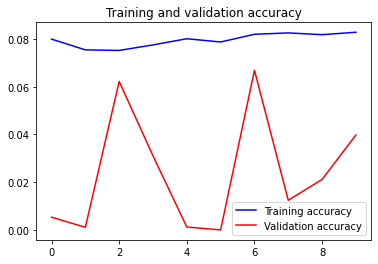

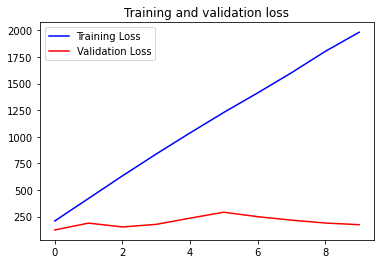

In [41]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Totally Unexpected behavior encountered!!!

## NEXT GOAL: Try debugging the cause of such behavior